In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [2]:
from net_analysis import *

In [3]:
path = "../DataSet SuperUsers/edges.csv"

In [4]:
path_graph = "../DataSet SuperUsers/Graph_data/"

In [5]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4147
Number of edges: 63400
Average degree:  30.5763


In [7]:
degrees = [d for u, d in G.degree()]  
nx

<module 'networkx' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\networkx\\__init__.py'>

In [8]:
# fitting the degree distribution of the RW
# se da 'random_state_index is incorrect' usare:
# pip install decorator==5.0.9
degrees = [d for u, d in G.degree()]  
cmodel = nx.configuration_model(degrees) 
print("Nodes:", cmodel.number_of_nodes())
print("Edges:", cmodel.number_of_edges())

Nodes: 4147
Edges: 63400


In [9]:
nx.write_graphml(cmodel, path_graph+"CM_Network.graphml")

# 1 - Degree Distribution

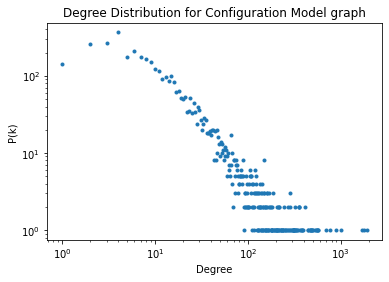

In [10]:
degree_dist(cmodel, "Configuration Model", "CM")

Calculating best minimal value for power law fit
**** Degree Distribution for Configuration Model graph ****


C:\Users\marco\Documents\sna-project-2022_cosmo_d-arrigo_esposito\SuperUsers\2 - NetworkAnalysis\net_analysis.py:40: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


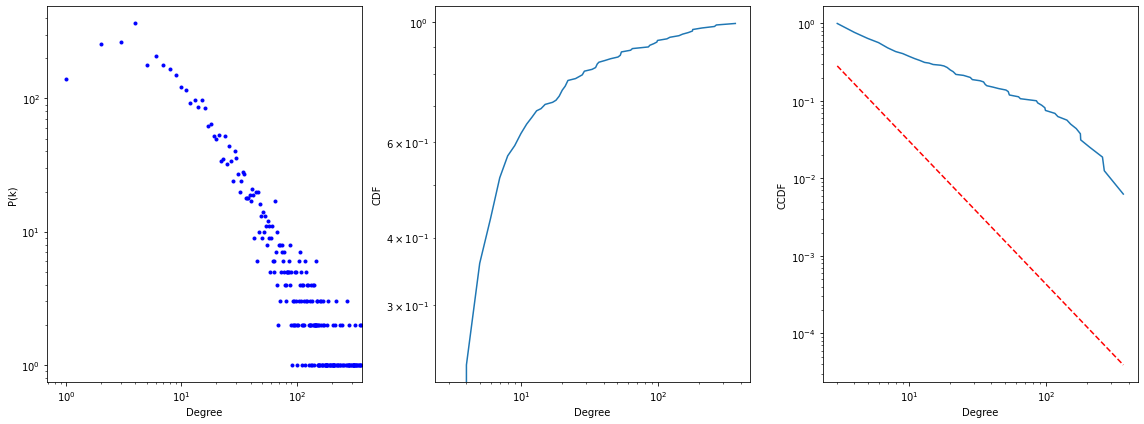

alpha=2.849220672901742 sigma=0.0673475801269356


In [11]:
plot_dist(cmodel, "Configuration Model", "CM")

In [12]:
info_degree(cmodel , "Configuration Model")

***** Degree info for Configuration Model graph ***
Maximum degree: (1901, 6)
Minimum degree: (1, 333)


# 2 - Connected Components

In [13]:
components = n_connected_components(cmodel , "Configuration Model")

**** Connected components for Configuration Model graph ****
Number of Connected Components for Configuration Model: 1
	 component len = 4147


# 3 - Path Analysis

In [14]:
path_analysis(cmodel , "Configuration Model", components)

***** Path analysis for Configuration Model graph
Diameter for components 0 network Configuration Model: 6
Average shortest path for components 0 network Configuration Model: 2.7267246119484256


# 4 - Clustering Coefficient

In [15]:
# not implemented for multigraph

# 5 - Density Analysis

In [16]:
density_analysis(cmodel , "Configuration Model")

Density for Configuration Model graph: 0.0073748963414116365
